# Arrhenius Equation
```{index} Arrhenius Equation
```

Arrhenius Equation is the equation that links rate constant, activation energy and temperature:

$$k = A\cdot\exp\left(-\frac{E_{a}}{RT}\right)$$

where

   * $k$ = rate constant
   * $E_a$ = Activation energy ($J/mol$): minimum energy required for reaction to occur (**CATALYSTS decrease $E_{a}$**)
   * $A$ = number of collisions with correct orientation to form products
   * $R$ = Universal gas constant
   * $T$ = Temperature
   
The term $\exp\left(-\frac{E_{a}}{RT}\right)$ represents the fraction of colliding molecules with kinetic energy equal or greater to $E_a$.

It can be seen from the equation that:

* As $E_a$ increases, $k$ decreases. 
* As $T$ increases, $k$ decreases. As a rule of thumb, **reaction rates roughly double for every $10^\circ C$ increase in $T$**.

Activation can be estimated if we have data for $k$ as a function of $T$. Considering Arrhenius equation again, then taking natural log to it, we get:

$$\ln(k) = \ln(A) - \frac{E_a}{R} \cdot \left(\frac{1}{T}\right)$$

which is a new linear equation of $\ln(k)$ against $1/T$ with a slope of $- \frac{E_a}{R}$ and the y-intercept of $\ln(A)$.
 
See the example below for a use case.

In [7]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from math import log10, floor

In [16]:
# create our own functions

# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    if value_rounded == int(value_rounded): 
        value_rounded = int(value_rounded)
    return value_rounded
            

def show_sign(value):
    string = str(abs(value))
    if value >= 0:
        string = '+'+string
    else:
        string = '-'+string
    return string



## Anorthite Dissolution

Let’s now consider the dissolution of anorthite in acidic conditions:

$$CaAl_{2}Si_{2}O_{8}+8H^{+}\longrightarrow Ca^{2+}+2Al^{3+}+2SiO_{2}+4H_{2}O$$

In the research paper below, there are experimental data for reaction rate as a function of temperature (Table 4 in the paper):

<p style="text-align:center;"><img src="images/AE1.png" style= "width: 90%"></p>

The key data are summarised in the following table; you will see that $3$ temperatures (in $^\circ C$) were tested, each resulting in a different reaction rate (in $mol\,cm^{3}s^{-1}$). From these data, it is possible to calculate the activation energy for the reaction.

1)	In order to do this, we will need to assume that the reaction rate is equal to the rate constant. What order would the reaction have to be in order to make this assumption? 

2)	The activation energy can be determined by plotting $\ln (k)$ vs $(1/T)$ and finding the gradient of the straight line.

3)	Select one value for each temperature and find the activation energy – you can use the linear trendline function in Excel to do this. If you are not sure how to do so, your GTA will be able to help. Be careful of units!

4)	Compare your value with those obtained in your group; by how much do they vary?

5)	Is this value of activation energy relatively large or small? Look up some data to compare; for example diamond to graphite, combustion of methane, weathering of limestone.


In [9]:
# creating a DataFrame
# rate of reaction for each T and all trials (not times 10^-12 yet)
rate_45C = [16.1, 13.9, 8.2, 9.8, 8.7, 10.7, 11.4]
rate_75C = [29.3, 23.5, 11.6, 20.2, 16.5, 13.9, 23.2, 24.3]
rate_95C = [19.6, 24.5, 32.8, 12.2, 25.9, 28.8, 15.8, 22.9]
rate_all = np.array([r*10**-12 for r in (rate_45C + rate_75C + rate_95C)])
T_all = np.array([45 for i in range(len(rate_45C))] + [75 for i in range(len(rate_75C))] + [95 for i in range(len(rate_95C))])

dict = {'Temperature $(^\circ C)$' : T_all,
        'Reaction rate' : rate_all}
df = pd.DataFrame(dict)

df.loc[:, 'Temperature $(^\circ C)$'] = df['Temperature $(^\circ C)$'].map('{:g}'.format)
df.loc[:, 'Reaction rate'] = df['Reaction rate'].map('{:.2e}'.format)

# displaying the DataFrame
display(df.style.hide_index())

Temperature $(^\circ C)$,Reaction rate
45,1.61e-11
45,1.39e-11
45,8.20e-12
45,9.80e-12
45,8.70e-12
45,1.07e-11
45,1.14e-11
75,2.93e-11
75,2.35e-11
75,1.16e-11


### Solutions

1) To be able to make the assumption, rate of the reaction must be independent of the concentrations of the reactants, i.e. the reaction must be zeroth-order.

2) See below

The activation energy is 13800 J/mol.


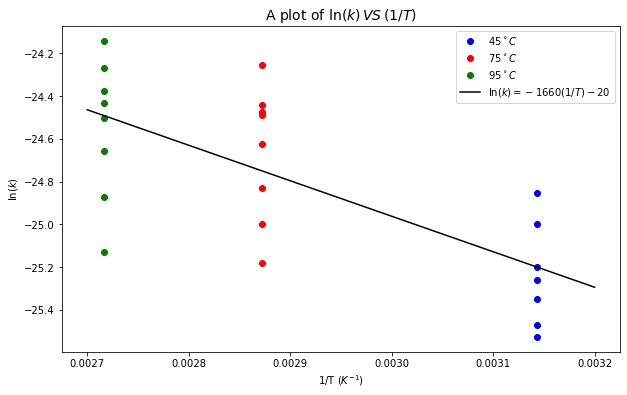

In [18]:
# data
# rate (don't forget to times by 10^-12)
ln_k_45C = np.log(np.array(rate_45C) * 10**-12)
ln_k_75C = np.log(np.array(rate_75C) * 10**-12)
ln_k_95C = np.log(np.array(rate_95C) * 10**-12)
# 1/T (don't forget to convert degree C to K)
reciprocal_T45 = [1/(45+273.15) for i in range(len(ln_k_45C))]
reciprocal_T75 = [1/(75+273.15) for i in range(len(ln_k_75C))]
reciprocal_T95 = [1/(95+273.15) for i in range(len(ln_k_95C))]

# plot data
plt.figure(figsize=(10,6))
plt.plot(reciprocal_T45, ln_k_45C, 'bo', label='$45^\circ C$')
plt.plot(reciprocal_T75, ln_k_75C, 'ro', label='$75^\circ C$')
plt.plot(reciprocal_T95, ln_k_95C, 'go', label='$95^\circ C$')

# combine all data
ln_k_all = np.concatenate((ln_k_45C, ln_k_75C, ln_k_95C))
reciprocal_T_all = np.concatenate((reciprocal_T45, reciprocal_T75, reciprocal_T95))
# Fit a polynomial degree 1 - ie a straight line.
poly_coeffs=np.polyfit(reciprocal_T_all, ln_k_all, 1)
p1 = np.poly1d(poly_coeffs)
slope = poly_coeffs[0]           # -Ea/R
y_intercept = poly_coeffs[1]   # ln(A)
x = np.linspace(0.0027, 0.0032, 2)  # no need of many x value to plot linear curve
plt.plot(x, p1(x), 'k', label=r'$\ln(k) = {0}(1/T){1}$'.format(round_to_n_sf(slope, 3), show_sign(round_to_n_sf(y_intercept, 3))))

# label and title the plot
plt.xlabel("1/T $(K^{-1})$")
plt.ylabel('$\ln(k)$')
plt.title('A plot of $\ln(k)\,VS\,(1/T)$', fontsize=14)
plt.legend(loc='best')

# calculate Ea
R = 8.314
print(f"The activation energy is {round_to_n_sf(-slope*R, 3)} J/mol.")

From the plot above, so

$$-\frac{E_a}{R} = -1660$$

$$\therefore {E_a} = 1.38\times10^{4}\,J\,mol^{-1}$$

3) You can pick a value of $k$ for each temperature and find $E_a$ using the same approach as above (plot $\ln(k)$ VS ($1/T$)), but there is also another method to deduce $E_a$ without plotting. Firstly, two data points $(T, k)$ with different $T$ have to be chosen. In this case, they will be 

$$(T_1, k_1)=(45+273.15\,K,\,16.1\times10^{-12}\,mol\,cm^{3}s^{-1})$$ 
$$(T_2, k_2)=(75+273.15\,K,\,29.3\times10^{-12}\,mol\,cm^{3}s^{-1})$$ 

Then, we get two natural-log-taken Arrhenius equations:

$$\ln(k_1) = \ln(A) - \frac{E_a}{R} \cdot \left(\frac{1}{T_1}\right)$$

$$\ln(k_2) = \ln(A) - \frac{E_a}{R} \cdot \left(\frac{1}{T_2}\right)$$

Subtracting the first equation by the second, we get:

$$\ln(k_1) - \ln(k_2)= \left[\ln(A) - \frac{E_a}{R} \cdot \left(\frac{1}{T_1}\right)\right] - \left[\ln(A) - \frac{E_a}{R} \cdot \left(\frac{1}{T_2}\right)\right]$$

$$\ln\left(\frac{k_1}{k_2}\right) = - \frac{E_a}{R} \cdot \left(\frac{1}{T_1}\right) + \frac{E_a}{R} \cdot \left(\frac{1}{T_2}\right)$$

$$\ln\left(\frac{k_1}{k_2}\right) = \frac{E_a}{R} \cdot \left(\frac{1}{T_2} - \frac{1}{T_1}\right)$$

Substituting the values of $T_1, k_1, T_2, k_2$, and $R=8.314\,J\,mol\,K^{-1}$, we get $E_a=1.8\times10^{4}\,J\,mol^{-1}$


For both of the approaches, the value of $E_a$ will be different for different data points picked.

The questions 4 and 5 will be left for group discussion.

## References

- Lecture note and group activity for Lecture 5 of the Chemistry for Geoscientists module
- Lecture note for Lecture 6 of the Low-Temperature Geochemistry module